In [1]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [2]:
!python --version

Python 3.9.16


In [3]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
using_colab = True

In [5]:
if using_colab:
    import torch
    import torchvision
    print("PyTorch version:", torch.__version__)
    print("Torchvision version:", torchvision.__version__)
    print("CUDA is available:", torch.cuda.is_available())
    import sys
    !{sys.executable} -m pip install opencv-python matplotlib
    !{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'
    
    !mkdir images
    !wget -P images https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/dog.jpg
        
    !wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

PyTorch version: 2.0.0+cu118
Torchvision version: 0.15.1+cu118
CUDA is available: True
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-azwmbc7s
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-azwmbc7s
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 3518c86b78b3bc9cf4fbe3d18e682fad1c79dc51
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36602 sha256=4d894b0b590c93540ed19f479be3ca269481bfa7a2a1f387da9287eec4adf74c
  Stored in directory: /tmp/pip-ephem-wheel-cache-sj6ouesv/wheels/d5/11/03/7aca746a2c0e09f279b10436ced7175926bc38f650b736a648
Successfully built segm

In [6]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [1]:
def show_anns(anns):
  if len(anns) == 0:
    return
  sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
  ax = plt.gca()
  ax.set_autoscale_on(False)
  polygons = []
  color = []
  for ann in sorted_anns:
    m = ann['segmentation']
    img = np.ones((m.shape[0], m.shape[1], 3))
    color_mask = np.random.random((1, 3)).tolist()[0]
    for i in range(3):
      img[:,:,i] = color_mask[i]
    ax.imshow(np.dstack((img, m*0.35)))

In [11]:
# Mount your google drive in google colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [12]:
image = cv2.imread('/content/drive/MyDrive/omdena-poland/data/rgb_da_numpy_converted.png')
print(type(image))
print(image.shape)

<class 'numpy.ndarray'>
(500, 500, 3)


In [13]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

<class 'numpy.ndarray'>
(500, 500, 3)


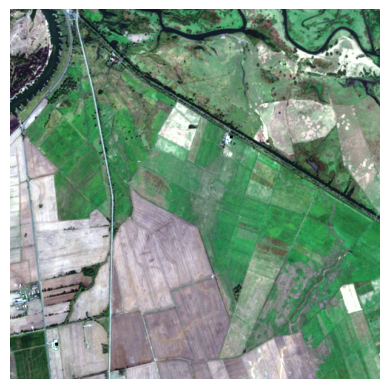

In [14]:
plt.figure()
plt.imshow(image)
plt.axis('off')
plt.show()

In [15]:
import sys
sys.path.append("")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = 'vit_h'
device = 'cuda'
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
mask_generator = SamAutomaticMaskGenerator(sam)

In [27]:
masks = mask_generator.generate(image)

In [42]:
dico = masks[0]

{'segmentation': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 'area': 21093,
 'bbox': [137, 225, 154, 212],
 'predicted_iou': 1.0143433809280396,
 'point_coords': [[209.671875, 309.734375]],
 'stability_score': 0.9884548187255859,
 'crop_box': [0, 0, 497, 461]}

In [17]:
type(masks)
print(len(masks))
print(masks[0].keys())

110
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


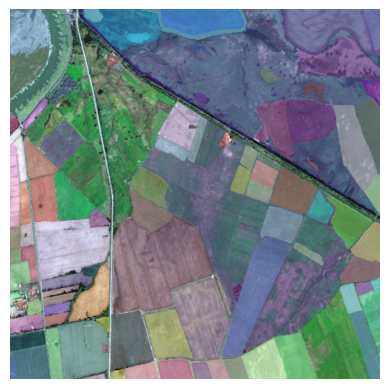

In [25]:
plt.figure()
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show()

In [29]:
# Export masks. WARNINGS: using pickle library, can create security issues.
np.save('/content/drive/MyDrive/omdena-poland/data/masks.npy',masks)